In [1]:
import pandas as pd
from sqlalchemy import create_engine
from MyCreds.mycreds import Capstone_AWS_PG

In [2]:
engine = create_engine(f'postgresql+psycopg2://{Capstone_AWS_PG.username}:{Capstone_AWS_PG.password}@{Capstone_AWS_PG.host}/capstone', echo=False)

# Switch depending on which table you want to read.
sql_query = 'select * from resale_prices;'
# sql_query = 'select * from resale_prices_based_on_approval_date;'

with engine.connect() as cnxn:
    rsp = pd.read_sql(sql_query, cnxn)

rsp

,month,block,town,street_name,address,storey_range,storey_range_min,storey_range_max,flat_model,flat_type,...,floor_area_sqm,lease_commence_date,remaining_lease,remaining_lease_years,remaining_lease_months,resale_price,price_per_sq_ft,price_per_sq_m,price_per_sq_ft_per_lease_yr,price_per_sq_m_per_lease_yr
0,1990-01-01,309,ANG MO KIO,ANG MO KIO AVE 1,309 ANG MO KIO AVENUE 1,10 TO 12,10,12,IMPROVED,1 ROOM,...,31.0,1977,None,86,NaN,9000.0,88.490320,290.322581,1.028957,3.375844
1,1990-01-01,307,CLEMENTI,CLEMENTI AVE 4,307 CLEMENTI AVENUE 4,01 TO 03,1,3,NEW GENERATION,3 ROOM,...,67.0,1979,None,88,NaN,47000.0,213.814919,701.492537,2.429715,7.971506
2,1990-01-01,309,CLEMENTI,CLEMENTI AVE 4,309 CLEMENTI AVENUE 4,04 TO 06,4,6,NEW GENERATION,3 ROOM,...,82.0,1980,None,89,NaN,57000.0,211.873164,695.121951,2.380597,7.810359
3,1990-01-01,309,CLEMENTI,CLEMENTI AVE 4,309 CLEMENTI AVENUE 4,10 TO 12,10,12,NEW GENERATION,3 ROOM,...,67.0,1980,None,89,NaN,34000.0,154.674622,507.462687,1.737917,5.701828
4,1990-01-01,310,CLEMENTI,CLEMENTI AVE 4,310 CLEMENTI AVENUE 4,04 TO 06,4,6,NEW GENERATION,3 ROOM,...,67.0,1980,None,89,NaN,47000.0,213.814919,701.492537,2.402415,7.881939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524519,2022-03-01,208B,CLEMENTI,CLEMENTI AVE 6,208B CLEMENTI AVENUE 6,19 TO 21,19,21,Model A,3 ROOM,...,68.0,2017,94 years 08 months,94,8.0,575000.0,2577.352859,8455.882353,27.418647,89.956195
1524520,2022-03-01,320,CLEMENTI,CLEMENTI AVE 4,320 CLEMENTI AVENUE 4,04 TO 06,4,6,New Generation,3 ROOM,...,67.0,1979,56 years 02 months,56,2.0,380888.0,1732.756100,5684.895522,30.942073,101.515991
1524521,2022-03-01,334,CLEMENTI,CLEMENTI AVE 2,334 CLEMENTI AVENUE 2,07 TO 09,7,9,New Generation,3 ROOM,...,67.0,1978,55 years 05 months,55,5.0,416000.0,1892.489492,6208.955224,34.408900,112.890095
1524522,2022-03-01,40,GEYLANG,CIRCUIT RD,40 CIRCUIT ROAD,10 TO 12,10,12,Standard,3 ROOM,...,57.0,1971,47 years 11 months,47,11.0,293000.0,1566.778897,5140.350877,32.641227,107.090643


In [3]:
engine = create_engine(f'postgresql+psycopg2://{Capstone_AWS_PG.username}:{Capstone_AWS_PG.password}@{Capstone_AWS_PG.host}/capstone', echo=False)

# Switch depending on which table you want to read.
sql_query = 'select * from resale_price_index;'
# sql_query = 'select * from resale_prices_based_on_approval_date;'

with engine.connect() as cnxn:
    hpi = pd.read_sql(sql_query, cnxn)

hpi

,quarter,index
0,1990-Q1,24.3
1,1990-Q2,24.4
2,1990-Q3,25.0
3,1990-Q4,24.7
4,1991-Q1,24.9
...,...,...
122,2020-Q3,133.9
123,2020-Q4,138.1
124,2021-Q1,142.2
125,2021-Q2,146.4


In [12]:
hpi['year'] = hpi['quarter'].str[:4].astype(int)
hpi['q_num'] = hpi['quarter'].str[-1].astype(int)
hpi

,quarter,index,year,q_num
0,1990-Q1,24.3,1990,1
1,1990-Q2,24.4,1990,2
2,1990-Q3,25.0,1990,3
3,1990-Q4,24.7,1990,4
4,1991-Q1,24.9,1991,1
...,...,...,...,...
122,2020-Q3,133.9,2020,3
123,2020-Q4,138.1,2020,4
124,2021-Q1,142.2,2021,1
125,2021-Q2,146.4,2021,2


In [13]:
rsp.dtypes

month                           datetime64[ns]
block                                   object
town                                    object
street_name                             object
address                                 object
storey_range                            object
storey_range_min                         int64
storey_range_max                         int64
flat_model                              object
flat_type                               object
n_rooms                                float64
floor_area_sqm                         float64
lease_commence_date                      int64
remaining_lease                         object
remaining_lease_years                    int64
remaining_lease_months                 float64
resale_price                           float64
price_per_sq_ft                        float64
price_per_sq_m                         float64
price_per_sq_ft_per_lease_yr           float64
price_per_sq_m_per_lease_yr            float64
dtype: object

In [15]:
rsp['q_num'] = rsp['month'].dt.quarter
rsp['year'] = rsp['month'].dt.year
rsp

,month,block,town,street_name,address,storey_range,storey_range_min,storey_range_max,flat_model,flat_type,...,remaining_lease,remaining_lease_years,remaining_lease_months,resale_price,price_per_sq_ft,price_per_sq_m,price_per_sq_ft_per_lease_yr,price_per_sq_m_per_lease_yr,q_num,year
0,1990-01-01,309,ANG MO KIO,ANG MO KIO AVE 1,309 ANG MO KIO AVENUE 1,10 TO 12,10,12,IMPROVED,1 ROOM,...,None,86,NaN,9000.0,88.490320,290.322581,1.028957,3.375844,1,1990
1,1990-01-01,307,CLEMENTI,CLEMENTI AVE 4,307 CLEMENTI AVENUE 4,01 TO 03,1,3,NEW GENERATION,3 ROOM,...,None,88,NaN,47000.0,213.814919,701.492537,2.429715,7.971506,1,1990
2,1990-01-01,309,CLEMENTI,CLEMENTI AVE 4,309 CLEMENTI AVENUE 4,04 TO 06,4,6,NEW GENERATION,3 ROOM,...,None,89,NaN,57000.0,211.873164,695.121951,2.380597,7.810359,1,1990
3,1990-01-01,309,CLEMENTI,CLEMENTI AVE 4,309 CLEMENTI AVENUE 4,10 TO 12,10,12,NEW GENERATION,3 ROOM,...,None,89,NaN,34000.0,154.674622,507.462687,1.737917,5.701828,1,1990
4,1990-01-01,310,CLEMENTI,CLEMENTI AVE 4,310 CLEMENTI AVENUE 4,04 TO 06,4,6,NEW GENERATION,3 ROOM,...,None,89,NaN,47000.0,213.814919,701.492537,2.402415,7.881939,1,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524519,2022-03-01,208B,CLEMENTI,CLEMENTI AVE 6,208B CLEMENTI AVENUE 6,19 TO 21,19,21,Model A,3 ROOM,...,94 years 08 months,94,8.0,575000.0,2577.352859,8455.882353,27.418647,89.956195,1,2022
1524520,2022-03-01,320,CLEMENTI,CLEMENTI AVE 4,320 CLEMENTI AVENUE 4,04 TO 06,4,6,New Generation,3 ROOM,...,56 years 02 months,56,2.0,380888.0,1732.756100,5684.895522,30.942073,101.515991,1,2022
1524521,2022-03-01,334,CLEMENTI,CLEMENTI AVE 2,334 CLEMENTI AVENUE 2,07 TO 09,7,9,New Generation,3 ROOM,...,55 years 05 months,55,5.0,416000.0,1892.489492,6208.955224,34.408900,112.890095,1,2022
1524522,2022-03-01,40,GEYLANG,CIRCUIT RD,40 CIRCUIT ROAD,10 TO 12,10,12,Standard,3 ROOM,...,47 years 11 months,47,11.0,293000.0,1566.778897,5140.350877,32.641227,107.090643,1,2022


In [17]:
rsp = rsp.merge(hpi[['q_num', 'year', 'index']], on=['year', 'q_num'])
rsp

,month,block,town,street_name,address,storey_range,storey_range_min,storey_range_max,flat_model,flat_type,...,remaining_lease_years,remaining_lease_months,resale_price,price_per_sq_ft,price_per_sq_m,price_per_sq_ft_per_lease_yr,price_per_sq_m_per_lease_yr,q_num,year,index
0,1990-01-01,309,ANG MO KIO,ANG MO KIO AVE 1,309 ANG MO KIO AVENUE 1,10 TO 12,10,12,IMPROVED,1 ROOM,...,86,NaN,9000.0,88.490320,290.322581,1.028957,3.375844,1,1990,24.3
1,1990-01-01,307,CLEMENTI,CLEMENTI AVE 4,307 CLEMENTI AVENUE 4,01 TO 03,1,3,NEW GENERATION,3 ROOM,...,88,NaN,47000.0,213.814919,701.492537,2.429715,7.971506,1,1990,24.3
2,1990-01-01,309,CLEMENTI,CLEMENTI AVE 4,309 CLEMENTI AVENUE 4,04 TO 06,4,6,NEW GENERATION,3 ROOM,...,89,NaN,57000.0,211.873164,695.121951,2.380597,7.810359,1,1990,24.3
3,1990-01-01,309,CLEMENTI,CLEMENTI AVE 4,309 CLEMENTI AVENUE 4,10 TO 12,10,12,NEW GENERATION,3 ROOM,...,89,NaN,34000.0,154.674622,507.462687,1.737917,5.701828,1,1990,24.3
4,1990-01-01,310,CLEMENTI,CLEMENTI AVE 4,310 CLEMENTI AVENUE 4,04 TO 06,4,6,NEW GENERATION,3 ROOM,...,89,NaN,47000.0,213.814919,701.492537,2.402415,7.881939,1,1990,24.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512236,2021-09-01,166,HOUGANG,HOUGANG AVE 1,166 HOUGANG AVENUE 1,04 TO 06,4,6,Model A,4 ROOM,...,75,3.0,438000.0,1321.805898,4336.633663,17.862242,58.603158,3,2021,150.6
1512237,2021-09-01,521,HOUGANG,HOUGANG AVE 6,521 HOUGANG AVENUE 6,01 TO 03,1,3,Simplified,4 ROOM,...,65,1.0,403000.0,1462.314239,4797.619048,22.848660,74.962798,3,2021,150.6
1512238,2021-09-01,34,BUKIT MERAH,TELOK BLANGAH WAY,34 TELOK BLANGAH WAY,01 TO 03,1,3,Improved,4 ROOM,...,53,7.0,412000.0,1531.434097,5024.390244,28.894983,94.799816,3,2021,150.6
1512239,2021-09-01,636,HOUGANG,HOUGANG AVE 8,636 HOUGANG AVENUE 8,04 TO 06,4,6,Simplified,4 ROOM,...,65,4.0,380000.0,1378.857099,4523.809524,21.544642,70.684524,3,2021,150.6


In [19]:
rsp['resale_price_norm'] = rsp['resale_price'] / rsp['index'] * 100
rsp

,month,block,town,street_name,address,storey_range,storey_range_min,storey_range_max,flat_model,flat_type,...,remaining_lease_months,resale_price,price_per_sq_ft,price_per_sq_m,price_per_sq_ft_per_lease_yr,price_per_sq_m_per_lease_yr,q_num,year,index,resale_price_norm
0,1990-01-01,309,ANG MO KIO,ANG MO KIO AVE 1,309 ANG MO KIO AVENUE 1,10 TO 12,10,12,IMPROVED,1 ROOM,...,NaN,9000.0,88.490320,290.322581,1.028957,3.375844,1,1990,24.3,37037.037037
1,1990-01-01,307,CLEMENTI,CLEMENTI AVE 4,307 CLEMENTI AVENUE 4,01 TO 03,1,3,NEW GENERATION,3 ROOM,...,NaN,47000.0,213.814919,701.492537,2.429715,7.971506,1,1990,24.3,193415.637860
2,1990-01-01,309,CLEMENTI,CLEMENTI AVE 4,309 CLEMENTI AVENUE 4,04 TO 06,4,6,NEW GENERATION,3 ROOM,...,NaN,57000.0,211.873164,695.121951,2.380597,7.810359,1,1990,24.3,234567.901235
3,1990-01-01,309,CLEMENTI,CLEMENTI AVE 4,309 CLEMENTI AVENUE 4,10 TO 12,10,12,NEW GENERATION,3 ROOM,...,NaN,34000.0,154.674622,507.462687,1.737917,5.701828,1,1990,24.3,139917.695473
4,1990-01-01,310,CLEMENTI,CLEMENTI AVE 4,310 CLEMENTI AVENUE 4,04 TO 06,4,6,NEW GENERATION,3 ROOM,...,NaN,47000.0,213.814919,701.492537,2.402415,7.881939,1,1990,24.3,193415.637860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512236,2021-09-01,166,HOUGANG,HOUGANG AVE 1,166 HOUGANG AVENUE 1,04 TO 06,4,6,Model A,4 ROOM,...,3.0,438000.0,1321.805898,4336.633663,17.862242,58.603158,3,2021,150.6,290836.653386
1512237,2021-09-01,521,HOUGANG,HOUGANG AVE 6,521 HOUGANG AVENUE 6,01 TO 03,1,3,Simplified,4 ROOM,...,1.0,403000.0,1462.314239,4797.619048,22.848660,74.962798,3,2021,150.6,267596.281541
1512238,2021-09-01,34,BUKIT MERAH,TELOK BLANGAH WAY,34 TELOK BLANGAH WAY,01 TO 03,1,3,Improved,4 ROOM,...,7.0,412000.0,1531.434097,5024.390244,28.894983,94.799816,3,2021,150.6,273572.377158
1512239,2021-09-01,636,HOUGANG,HOUGANG AVE 8,636 HOUGANG AVENUE 8,04 TO 06,4,6,Simplified,4 ROOM,...,4.0,380000.0,1378.857099,4523.809524,21.544642,70.684524,3,2021,150.6,252324.037185


<AxesSubplot:xlabel='month'>

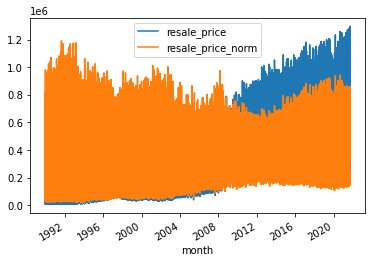

In [21]:
rsp.plot(x='month', y=['resale_price', 'resale_price_norm'])

<AxesSubplot:xlabel='month'>

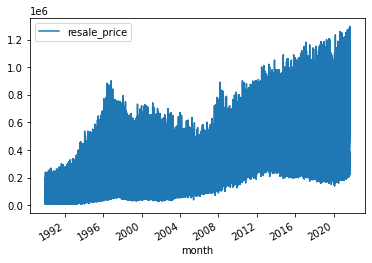

In [22]:
rsp.plot(x='month', y='resale_price')

<AxesSubplot:xlabel='month'>

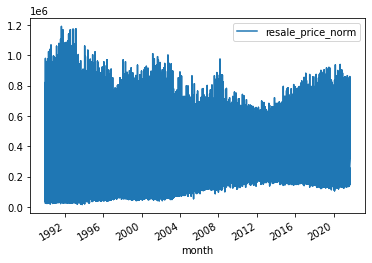

In [23]:
rsp.plot(x='month', y='resale_price_norm')